In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # high level interface for drawing attractive and informative statistical graphics
from sklearn.model_selection import train_test_split # the train test_split_function is used to split datasets into training and testing sets for machine learning model training and evaluation.
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, f1_score
# accuracy_score : Measures the percentage of correctly predicted values.
# classification_report() : print(classification_report(Y_test, Y_pred))
# Gives Precision / Recall / F1-Score / Support
# confusion_matrix() Returns a 2x2 matrix (for binary classification) showing TP, TN, FP, and FN.

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


###- Upload the DataSet using Kaggle API

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaafour02","key":"2df5203882eae47823fc2302549889e3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023
!unzip credit-card-fraud-detection-dataset-2023.zip -d creditcard_data



Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_data/creditcard_2023.csv  


In [ ]:
df = pd.read_csv('creditcard_data/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# --- Data Cleaning ---

In [ ]:
df.info() #: here I explored the dataset, and noticed that there is only two types (Float64 & int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.isna().sum() # I first started by checking duplicates but there is none

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.duplicated().sum() # no duplicates

np.int64(0)

# --- Feature Engineering ---

In [ ]:
df['Class'].value_counts() # No need to use SMOTE here because the dataset is already balanced with 284315 fraud and 284135 non-Fraud

,count
Class,
0,284315
1,284315


<ipython-input-11-db55518b64dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df, palette='Set1', dodge = True)


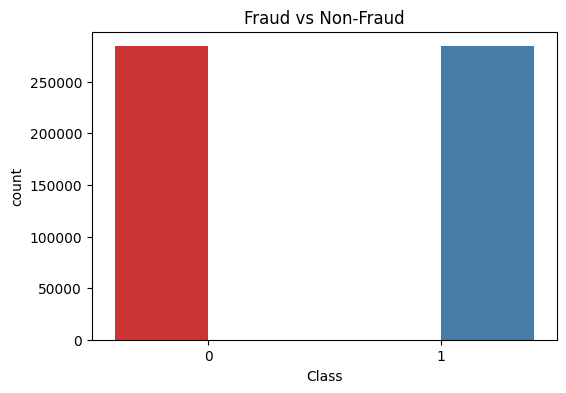

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df, palette='Set1', dodge = True)
plt.title('Fraud vs Non-Fraud')
plt.show() # here is a plot to show haw balanced is the set.

## --- Feature Selection ---

In [ ]:
X= df.drop(columns=['id','Class']) #These remaining columns are the features that I will use for training a machine learning model.
Y= df['Class'] #Target Label


## --- Train-Test Split ---

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# 20% of the data will be used for testing, and the remaining 80% will be used for training.
print(X.shape,X_train.shape, X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(568630, 29) (454904, 29) (113726, 29)
(568630,) (454904,) (113726,)


##--- Train & Compare Models ---

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name="Model"):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"{model_name} F1 Score: {f1:.4f}")
    print(f" Classification Report:\n{classification_report(Y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, y_pred)}\n")

    return model_name, acc, f1


In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

results = []
for name, model in models:
    model_name, acc, f1 = train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name=name)
    results.append((model_name, acc, f1))


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"]).sort_values(by="Accuracy", ascending=False)
f1_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"]).sort_values(by="F1 Score", ascending=False)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9643
Logistic Regression F1 Score: 0.9643
 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     56506
           1       0.98      0.95      0.96     57220

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Confusion Matrix:
[[55207  1299]
 [ 2757 54463]]

Random Forest Accuracy: 0.9999
Random Forest F1 Score: 0.9999
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56495    11]
 [    0 57220]]



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:37:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9997
XGBoost F1 Score: 0.9997
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56472    34]
 [    0 57220]]



<ipython-input-33-6ece623658a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


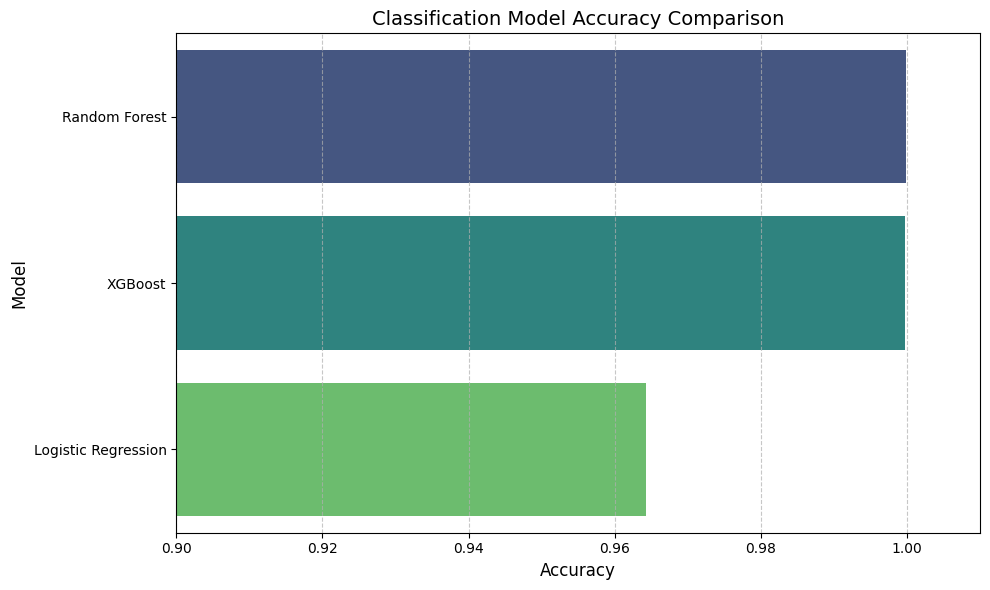

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")

plt.title("Classification Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0.9, 1.01)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()

<ipython-input-35-0418ab0f22fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Model", data=f1_df, palette="coolwarm")


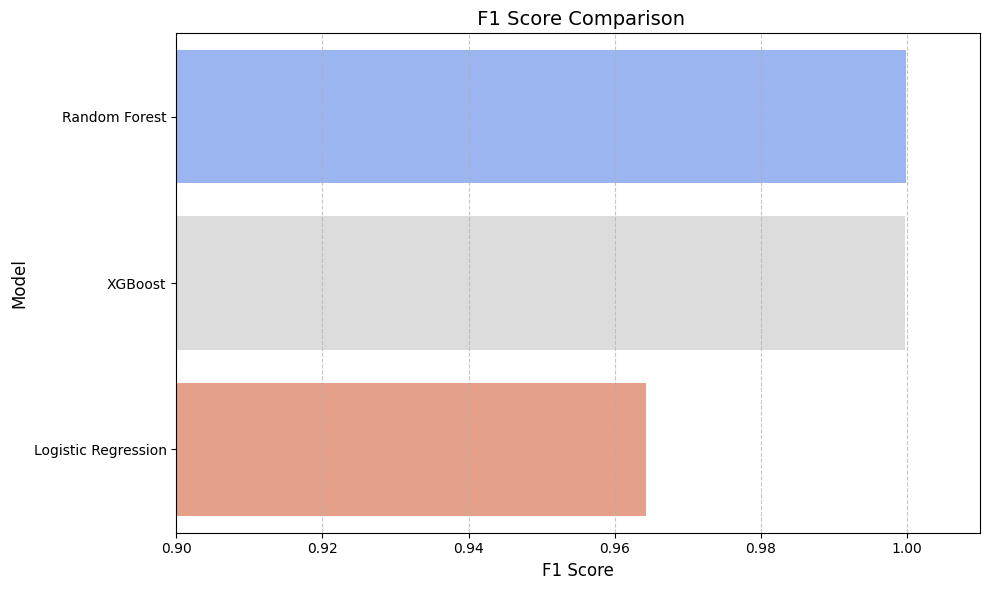

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y="Model", data=f1_df, palette="coolwarm")

plt.title(" F1 Score Comparison", fontsize=14)
plt.xlabel("F1 Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0.9, 1.01)  # adjust depending on your data
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("model_f1_score_comparison.png")
plt.show()

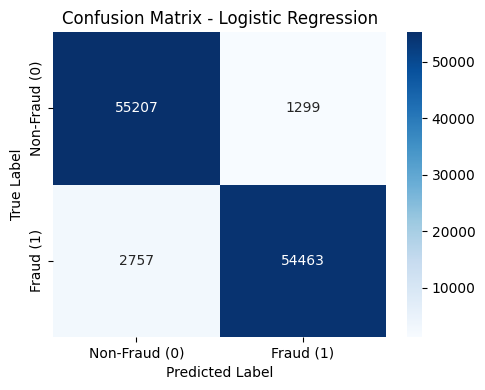

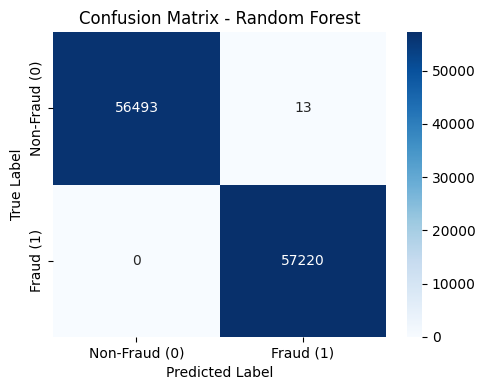

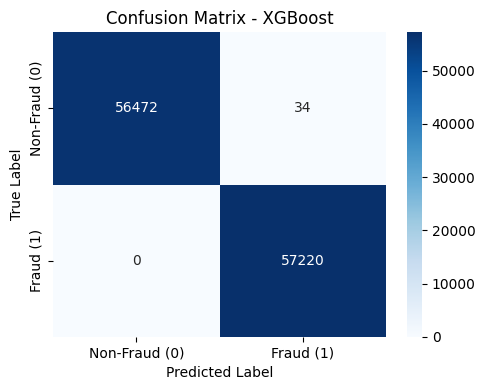

In [ ]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
                yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'conf_matrix_{model_name.replace(" ", "_").lower()}.png')
    plt.show()

# Example: plot confusion matrices for each model
for name, model in models:
    y_pred = model.predict(X_test)
    plot_conf_matrix(Y_test, y_pred, name)